# Assignment 5 [Logistic Regression]

* In this assignment, we will be testing optimization algorithms (liblinear, newton-cg, and lbfgs) available in logistic regression. 

* The digits() dataset in sklearn has 10 classes of 8x8 images for each of the digits from 0 to 9. On average, there are about 180 samples per class (i.e., per digit) for a total of 1797 samples.

* For each algorithm from liblinear, newton-cg, and lbfgs (default), we will Split the data into (25% testing,75% training) and (40% testing, 60% training) datasets and compute score, AUC, and Confusion Matrix.

In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#dataset from sklearn
from sklearn.datasets import load_digits

#model building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
#loading the data
digits = load_digits()
digits.data.shape

(1797, 64)

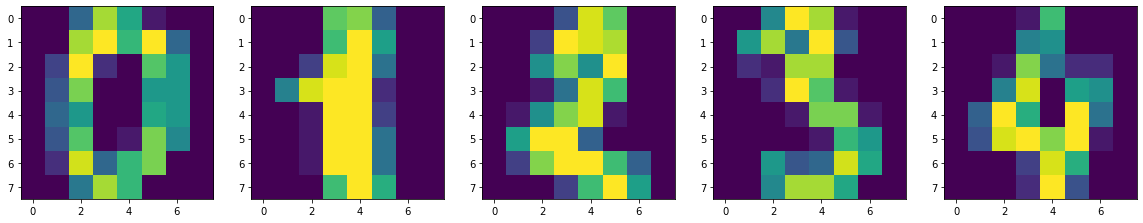

In [3]:
#displaying the images
plt.figure(figsize=(20,4))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(digits.images[i])

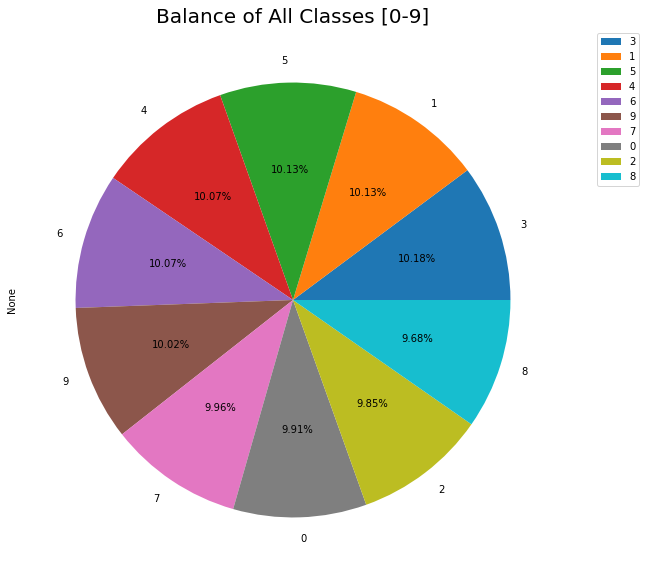

In [4]:
#checking for class imbalance
plt.figure(1, figsize=(20,10))
pd.Series(digits.target).value_counts().plot.pie(autopct="%.2f%%")
plt.title('Balance of All Classes [0-9]',size=20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# A Library for Large Linear Classification (liblinear)

It’s a linear classification that supports logistic regression and linear support vector machines. The solver uses a Coordinate Descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes. It applies automatic parameter selection (L1 Regularization) and it’s recommended when you have high dimension dataset (recommended for solving large-scale classification problems)

#### Drawbacks:

* It may get stuck at a non-stationary point (i.e. non-optima) if the level curves of a function are not smooth.
* Also cannot run in parallel.
* It cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion, so separate binary classifiers are trained for all classes.


In [5]:
# import warnings
# from sklearn.model_selection import GridSearchCV 
# warnings.filterwarnings('ignore')

# parameters = {'penalty': ['l1','l2'], 
#               'C': np.logspace(-3,3,7), 
#               'solver': ['newton-cg', 'lbfgs', 'liblinear']}
# logreg = LogisticRegression(max_iter=10000,n_jobs=-1)
# clf = GridSearchCV(logreg,                    # model
#                    param_grid = parameters,   # hyperparameters
#                    scoring='accuracy',        # metric for scoring
#                    cv=10)
# clf.fit(x_train,y_train)
# print("Tuned Hyperparameters :", clf.best_params_)

### 'Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}''

# Split 75/25

In [6]:
#dividing the data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [7]:
#model training
logisticregressionmodel1 = LogisticRegression(solver='liblinear',max_iter=10000)
logisticregressionmodel1.fit(x_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [8]:
#predictions test
predicted_y = logisticregressionmodel1.predict(x_test)
predicted_y

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 8, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 8, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [9]:
#metric1 - accuracy score
logisticregressionmodel1.score(x_test,y_test)

0.9666666666666667

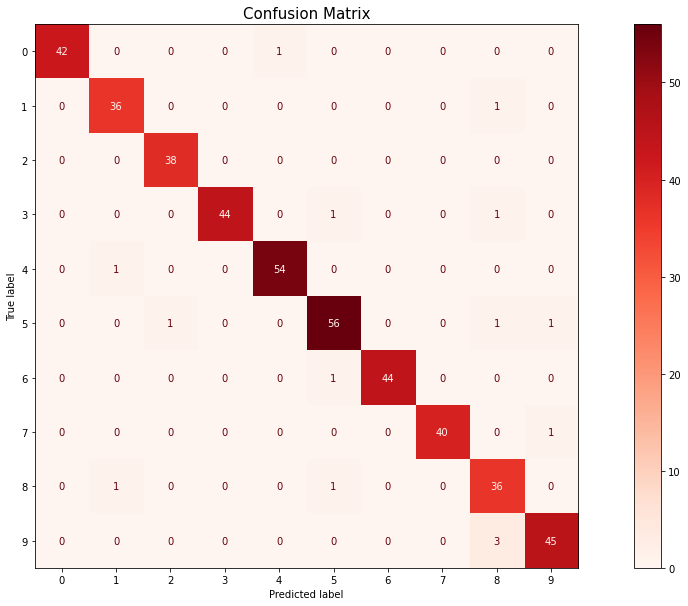

In [10]:
#metric2 - confusion matrix
model1confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel1.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model1confusionmatrix,display_labels=logisticregressionmodel1.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [11]:
#metric3 - roc-auc score
metrics.roc_auc_score(y_test,logisticregressionmodel1.predict_proba(x_test),multi_class="ovr")

0.997753871959622

In [12]:
#metric4 - classification report
model1report = metrics.classification_report(y_test,predicted_y)
print(model1report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      0.97      0.96        37
           2       0.97      1.00      0.99        38
           3       1.00      0.96      0.98        46
           4       0.98      0.98      0.98        55
           5       0.95      0.95      0.95        59
           6       1.00      0.98      0.99        45
           7       1.00      0.98      0.99        41
           8       0.86      0.95      0.90        38
           9       0.96      0.94      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



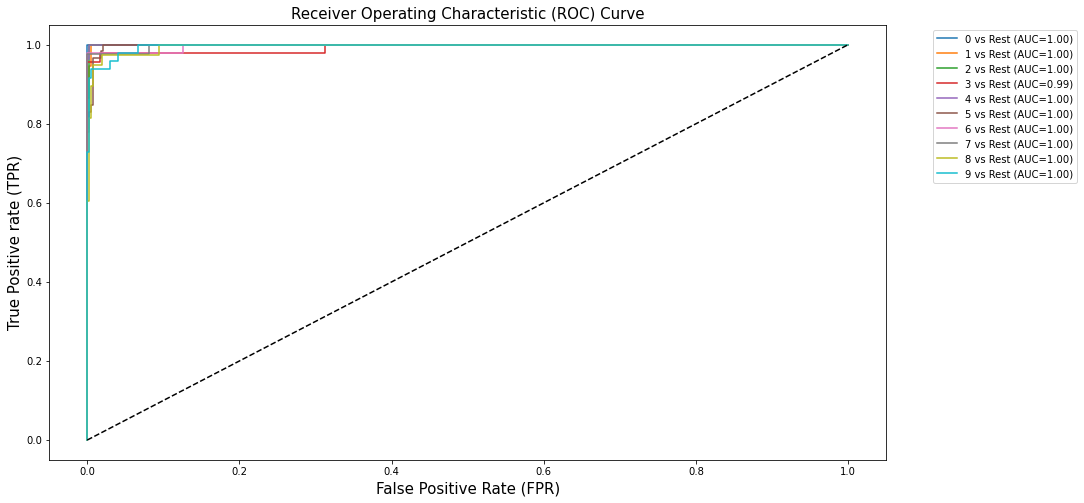

In [13]:
#metric5 - roc curves
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

fig, ax = plt.subplots(figsize=(15,8))
for i in range(10):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test_binarized[:,i], logisticregressionmodel1.predict_proba(x_test)[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='%s vs Rest (AUC=%0.002f)'%(logisticregressionmodel1.classes_[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve',size = 15)
plt.xlabel('False Positive Rate (FPR)', size = 15) 
plt.ylabel('True Positive rate (TPR)', size = 15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Split 60/40

In [14]:
#dividing the data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.40, random_state=42)

In [15]:
#model training
logisticregressionmodel2 = LogisticRegression(solver='liblinear',max_iter=1000)
logisticregressionmodel2.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [16]:
#predictions test
predicted_y = logisticregressionmodel2.predict(x_test)
predicted_y

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 8, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 1, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 8, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 8, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [17]:
#metric1 - accuracy score
logisticregressionmodel2.score(x_test,y_test)

0.9596662030598053

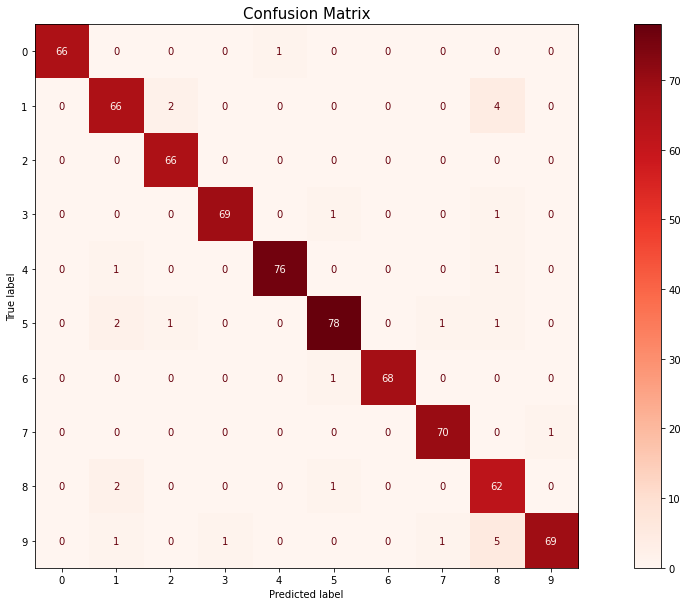

In [18]:
#metric2 - confusion matrix
model2confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel2.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model2confusionmatrix,display_labels=logisticregressionmodel2.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [19]:
#metric3 - roc-auc score
metrics.roc_auc_score(y_test,logisticregressionmodel2.predict_proba(x_test),multi_class="ovr")

0.9971261921779228

In [20]:
#metric4 - classification report
model2report = metrics.classification_report(y_test,predicted_y)
print(model2report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.92      0.92      0.92        72
           2       0.96      1.00      0.98        66
           3       0.99      0.97      0.98        71
           4       0.99      0.97      0.98        78
           5       0.96      0.94      0.95        83
           6       1.00      0.99      0.99        69
           7       0.97      0.99      0.98        71
           8       0.84      0.95      0.89        65
           9       0.99      0.90      0.94        77

    accuracy                           0.96       719
   macro avg       0.96      0.96      0.96       719
weighted avg       0.96      0.96      0.96       719



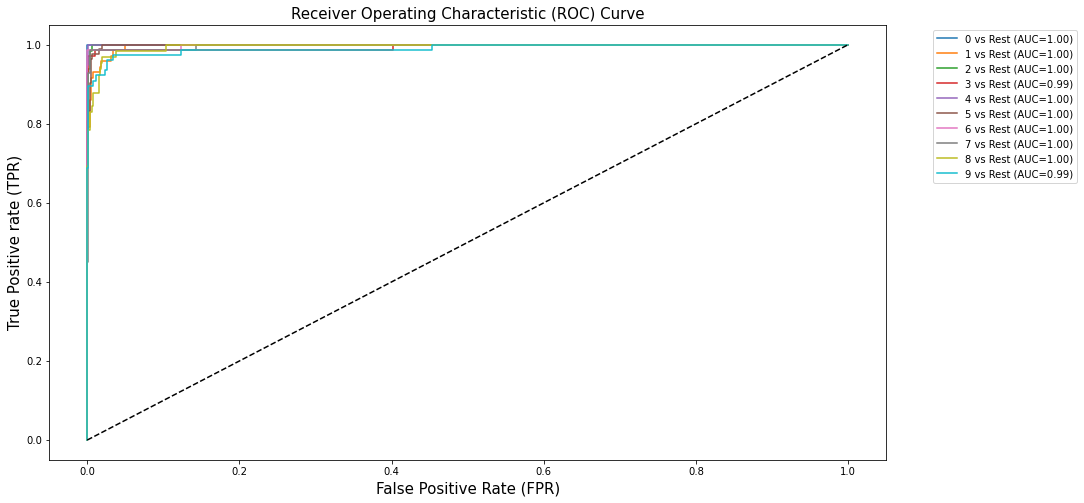

In [21]:
#metric5 - roc curves
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

fig, ax = plt.subplots(figsize=(15,8))
for i in range(10):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test_binarized[:,i], logisticregressionmodel2.predict_proba(x_test)[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='%s vs Rest (AUC=%0.002f)'%(logisticregressionmodel2.classes_[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve',size=15)
plt.xlabel('False Positive Rate (FPR)',size=15)
plt.ylabel('True Positive rate (TPR)',size=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Newton’s Method (newton-cg)

Newton’s method uses in a sense a better quadratic function minimisation. It's better because it uses the quadratic approximation (i.e. first AND second partial derivatives). You can imagine it as a twisted Gradient Descent with the Hessian (the Hessian is a square matrix of second-order partial derivatives of order n X n). Moreover, the geometric interpretation of Newton's method is that at each iteration one approximates f(x) by a quadratic function around xn, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if f(x) happens to be a quadratic function, then the exact extremum is found in one step.

### Drawbacks:

* It’s computationally expensive because of the Hessian Matrix (i.e. second partial derivatives calculations).
* It attracts to Saddle Points which are common in multivariable optimization (i.e. a point that its partial derivatives disagree over whether this input should be a maximum or a minimum point!).

# Split 75/25

In [22]:
#dividing the data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [23]:
#model training
logisticregressionmodel3 = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.01,penalty='l2')
logisticregressionmodel3.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=10000, solver='newton-cg')

In [24]:
#predictions test
predicted_y = logisticregressionmodel3.predict(x_test)
predicted_y

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [25]:
#metric1 - accuracy score
logisticregressionmodel3.score(x_test,y_test)

0.9733333333333334

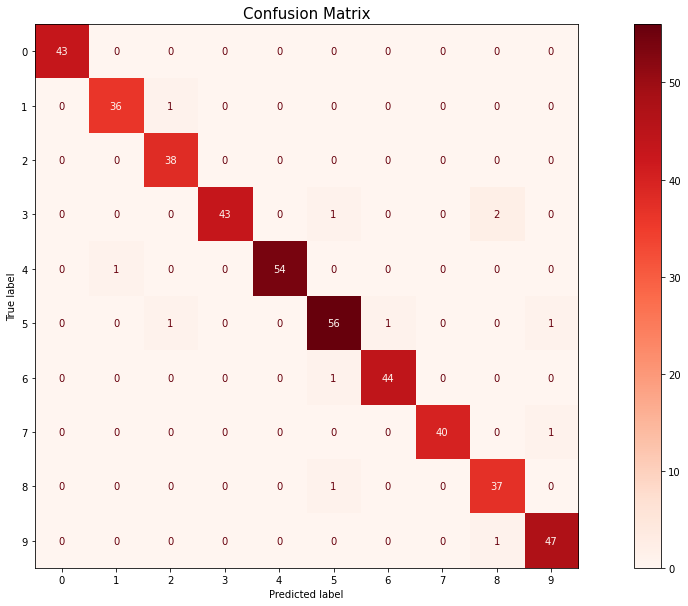

In [26]:
#metric2 - confusion matrix
model3confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel3.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model3confusionmatrix,display_labels=logisticregressionmodel3.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [27]:
#metric3 - roc-auc score
metrics.roc_auc_score(y_test,logisticregressionmodel3.predict_proba(x_test),multi_class="ovr")

0.9994695488449491

In [28]:
#metric4 - classification report
model3report = metrics.classification_report(y_test,predicted_y)
print(model3report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.95      1.00      0.97        38
           3       1.00      0.93      0.97        46
           4       1.00      0.98      0.99        55
           5       0.95      0.95      0.95        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.96      0.98      0.97        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



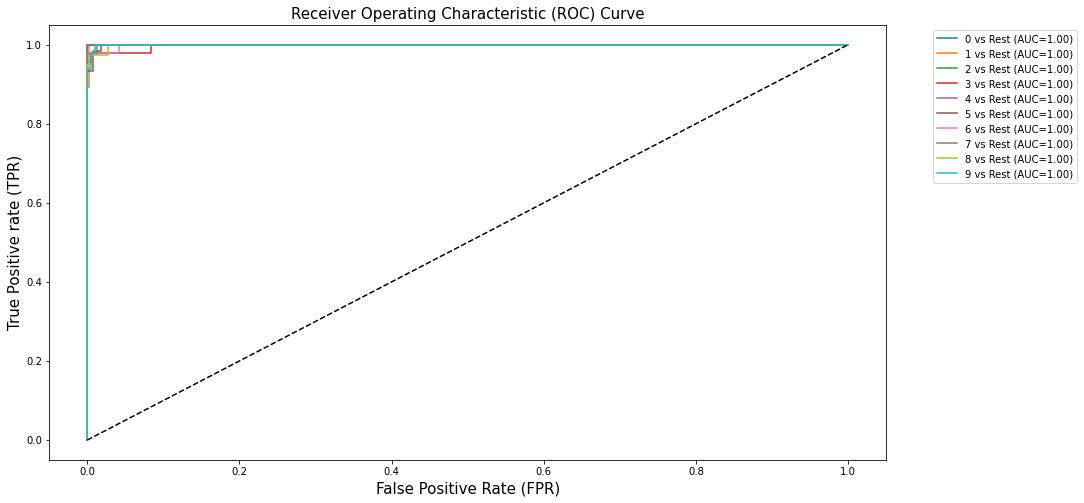

In [29]:
#metric5 - roc curves
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

fig, ax = plt.subplots(figsize=(15,8))
for i in range(10):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test_binarized[:,i], logisticregressionmodel3.predict_proba(x_test)[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='%s vs Rest (AUC=%0.002f)'%(logisticregressionmodel3.classes_[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve',size=15)
plt.xlabel('False Positive Rate (FPR)',size=15)
plt.ylabel('True Positive rate (TPR)',size=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Split 60/40

In [30]:
#dividing the data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=42)

In [31]:
#model training
logisticregressionmodel4 = LogisticRegression(solver='newton-cg',max_iter=10000,C=0.01,penalty='l2')
logisticregressionmodel4.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=10000, solver='newton-cg')

In [32]:
#predictions test
predicted_y = logisticregressionmodel4.predict(x_test)
predicted_y

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [33]:
#metric1 - accuracy score
logisticregressionmodel4.score(x_test,y_test)

0.9763560500695411

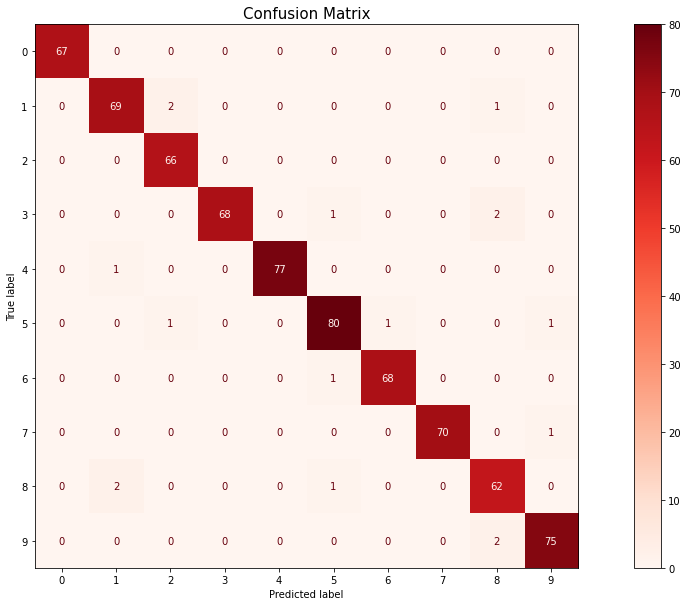

In [34]:
#metric2 - confusion matrix
model4confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel4.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model4confusionmatrix,display_labels=logisticregressionmodel4.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [35]:
#metric3 - roc-auc score
metrics.roc_auc_score(y_test,logisticregressionmodel4.predict_proba(x_test),multi_class="ovr")

0.9992566573526478

In [36]:
#metric4 - classification report
model4report = metrics.classification_report(y_test,predicted_y)
print(model4report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.96      0.96      0.96        72
           2       0.96      1.00      0.98        66
           3       1.00      0.96      0.98        71
           4       1.00      0.99      0.99        78
           5       0.96      0.96      0.96        83
           6       0.99      0.99      0.99        69
           7       1.00      0.99      0.99        71
           8       0.93      0.95      0.94        65
           9       0.97      0.97      0.97        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



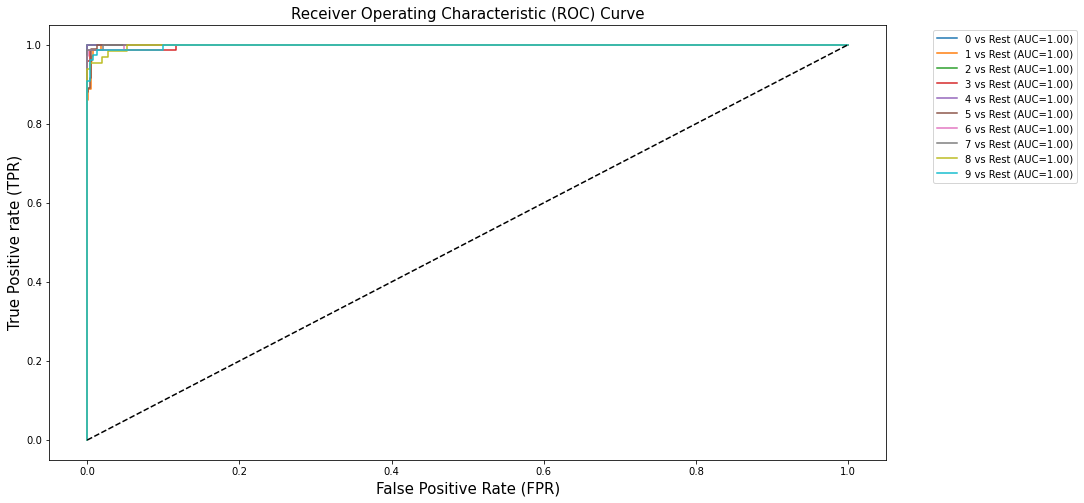

In [37]:
#metric5 - roc curves
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

fig, ax = plt.subplots(figsize=(15,8))
for i in range(10):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test_binarized[:,i], logisticregressionmodel4.predict_proba(x_test)[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='%s vs Rest (AUC=%0.002f)'%(logisticregressionmodel4.classes_[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve',size=15)
plt.xlabel('False Positive Rate (FPR)',size=15)
plt.ylabel('True Positive rate (TPR)',size=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm (lbfgs)

In a nutshell, it is an analogue of Newton’s Method, yet here the Hessian matrix is approximated using updates specified by gradient evaluations (or approximate gradient evaluations). In other words, using estimation to the inverse Hessian matrix. The term Limited-memory simply means it stores only a few vectors that represent the approximation implicitly. 

### Drawbacks

* When the dataset is small, L-BFGS relatively performs the best compared to other methods especially because it saves a lot of memory, however, there are some “serious” drawbacks such that if it is unsafeguarded, it may not converge to anything.

# Split 75/25

In [38]:
#dividing the data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [39]:
#model training
logisticregressionmodel5 = LogisticRegression(solver='lbfgs',max_iter=10000,C=0.01,penalty='l2')
logisticregressionmodel5.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=10000)

In [40]:
#predictions test
predicted_y = logisticregressionmodel5.predict(x_test)
predicted_y

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [41]:
#metric1 - accuracy score
logisticregressionmodel5.score(x_test,y_test)

0.9733333333333334

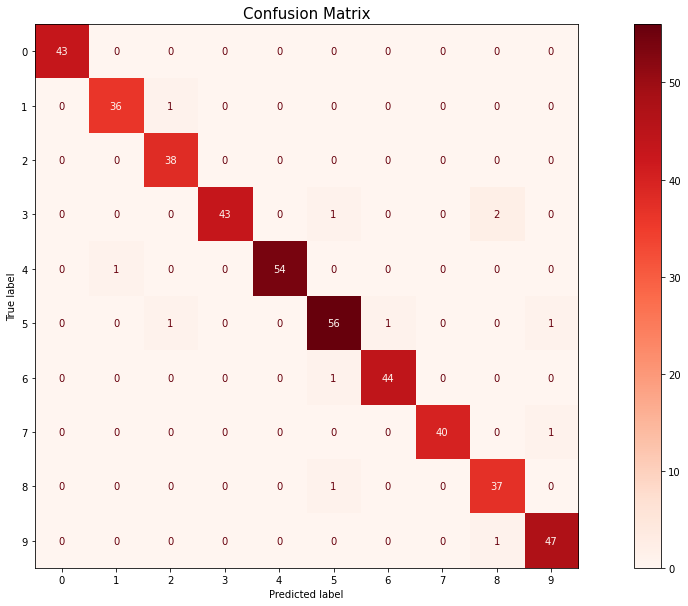

In [42]:
#metric2 - confusion matrix
model5confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel5.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model5confusionmatrix,display_labels=logisticregressionmodel5.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [43]:
#metric3 - roc-auc score
metrics.roc_auc_score(y_test,logisticregressionmodel5.predict_proba(x_test),multi_class="ovr")

0.9994695488449491

In [44]:
#metric4 - classification report
model5report = metrics.classification_report(y_test,predicted_y)
print(model5report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.95      1.00      0.97        38
           3       1.00      0.93      0.97        46
           4       1.00      0.98      0.99        55
           5       0.95      0.95      0.95        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.96      0.98      0.97        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



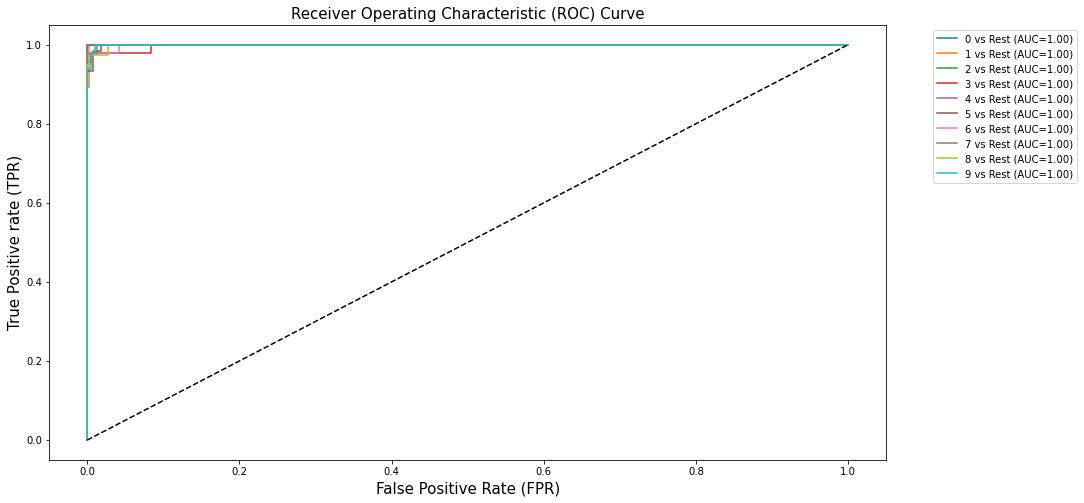

In [45]:
#metric5 - roc curves
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

fig, ax = plt.subplots(figsize=(15,8))
for i in range(10):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test_binarized[:,i], logisticregressionmodel5.predict_proba(x_test)[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='%s vs Rest (AUC=%0.002f)'%(logisticregressionmodel5.classes_[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve',size=15)
plt.xlabel('False Positive Rate (FPR)',size=15)
plt.ylabel('True Positive rate (TPR)',size=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Split 60/40

In [46]:
#dividing the data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=42)

In [47]:
#model training
logisticregressionmodel6 = LogisticRegression(solver='lbfgs',max_iter=10000,C=0.01,penalty='l2')
logisticregressionmodel6.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=10000)

In [48]:
#predictions test
predicted_y = logisticregressionmodel6.predict(x_test)
predicted_y

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 8, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [49]:
#metric1 - accuracy score
logisticregressionmodel6.score(x_test,y_test)

0.9749652294853964

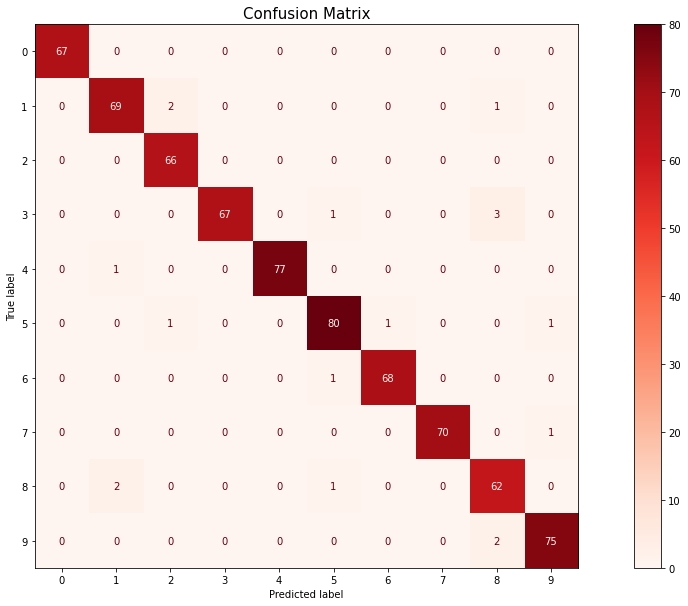

In [50]:
#metric2 - confusion matrix
model6confusionmatrix = metrics.confusion_matrix(y_test, predicted_y, labels = logisticregressionmodel6.classes_)
confusionmatriximage = metrics.ConfusionMatrixDisplay(confusion_matrix=model6confusionmatrix,display_labels=logisticregressionmodel6.classes_)
fig, ax = plt.subplots(figsize=(20,10))
confusionmatriximage.plot(cmap='Reds',ax=ax)
plt.title('Confusion Matrix',size=15)
plt.show()

In [51]:
#metric3 - roc-auc score
metrics.roc_auc_score(y_test,logisticregressionmodel6.predict_proba(x_test),multi_class="ovr")

0.9992588040124453

In [52]:
#metric4 - classification report
model6report = metrics.classification_report(y_test,predicted_y)
print(model6report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.96      0.96      0.96        72
           2       0.96      1.00      0.98        66
           3       1.00      0.94      0.97        71
           4       1.00      0.99      0.99        78
           5       0.96      0.96      0.96        83
           6       0.99      0.99      0.99        69
           7       1.00      0.99      0.99        71
           8       0.91      0.95      0.93        65
           9       0.97      0.97      0.97        77

    accuracy                           0.97       719
   macro avg       0.98      0.98      0.97       719
weighted avg       0.98      0.97      0.98       719



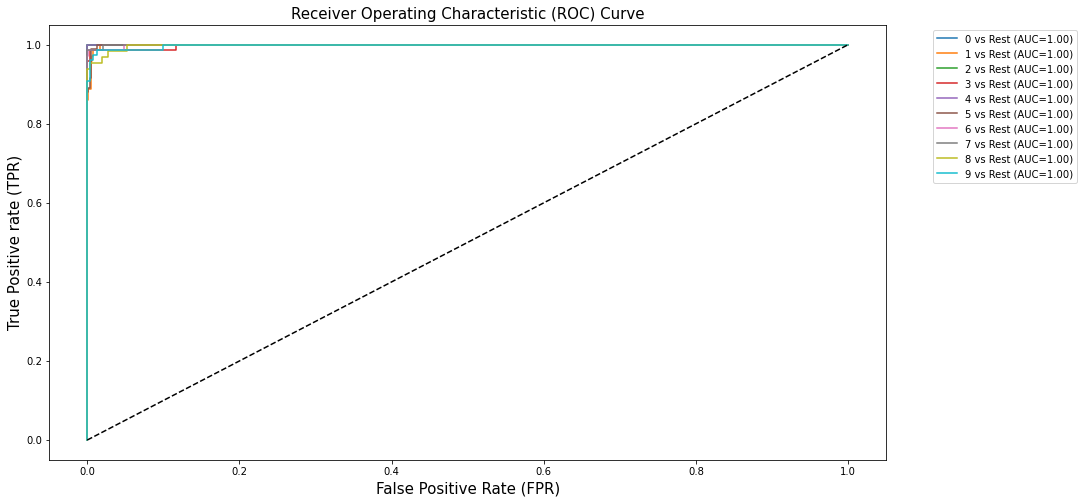

In [53]:
#metric5 - roc curves
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

fig, ax = plt.subplots(figsize=(15,8))
for i in range(10):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test_binarized[:,i], logisticregressionmodel6.predict_proba(x_test)[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='%s vs Rest (AUC=%0.002f)'%(logisticregressionmodel6.classes_[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve',size=15)
plt.xlabel('False Positive Rate (FPR)',size=15)
plt.ylabel('True Positive rate (TPR)',size=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Model-1: 0.931530 (0.035010)
Model-2: 0.931530 (0.035010)
Model-3: 0.941546 (0.029506)
Model-4: 0.941546 (0.029506)
Model-5: 0.941546 (0.029506)
Model-6: 0.941546 (0.029506)


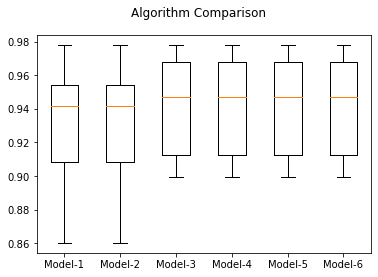

In [54]:
#model comparision - on whole
from sklearn import model_selection

X = digits.data
Y = digits.target

# prepare models
models = []
models.append(('Model-1', logisticregressionmodel1))
models.append(('Model-2', logisticregressionmodel2))
models.append(('Model-3', logisticregressionmodel3))
models.append(('Model-4', logisticregressionmodel4))
models.append(('Model-5', logisticregressionmodel5))
models.append(('Model-6', logisticregressionmodel6))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()